In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models, layers, optimizers
from keras.models import load_model

import cv2
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import time
import pathlib
from glob import glob

In [25]:
!pwd

/content


In [3]:
img_dir = "/content/drive/MyDrive/Colab Notebooks/datasets/three_label/"

In [4]:
random_seed =414

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,  vertical_flip=True, fill_mode='nearest')

train = datagen.flow_from_directory(img_dir, target_size=(640, 640), seed=random_seed,
                                              batch_size=10, class_mode='categorical', subset='training' )
test= datagen.flow_from_directory(img_dir, target_size=(640, 640), seed=random_seed,
                                              batch_size=10, class_mode='categorical', subset='validation')

Found 98 images belonging to 3 classes.
Found 42 images belonging to 3 classes.


In [5]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (640, 640, 3))

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':       
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 640, 640, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 640, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 640, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 320, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 320, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 320, 320, 128)     147584    
______________________________________________________________

In [6]:
tf.keras.initializers.HeNormal()  

VGG16_model = models.Sequential()
VGG16_model.add(conv_base)   

VGG16_model.add(layers.Flatten())

VGG16_model.add(layers.Dense(512, activation = 'relu'))
VGG16_model.add(layers.Dropout(0.5))
VGG16_model.add(layers.BatchNormalization())

VGG16_model.add(layers.Dense(256))
VGG16_model.add(layers.Dropout(0.2))
VGG16_model.add(layers.BatchNormalization())
VGG16_model.add(layers.Activation('relu'))

VGG16_model.add(layers.Dense(3, activation = 'softmax'))   

VGG16_model.summary()

## Total Trainable params: 112,070,657

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 20, 20, 512)       14714688  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               104858112 
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [7]:
VGG16_model.compile(loss = 'categorical_crossentropy', 
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

In [9]:
Hist = VGG16_model.fit(train, steps_per_epoch = train.n// train.batch_size, epochs=100,
                       validation_data = test, validation_steps=test.n/test.batch_size)

Epoch 1/100
9/9 [==============================] - 124s 8s/step - loss: 1.3608 - accuracy: 0.3214 - val_loss: 1.3068 - val_accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - 17s 2s/step - loss: 1.4037 - accuracy: 0.3515 - val_loss: 1.2697 - val_accuracy: 0.5000
Epoch 3/100
9/9 [==============================] - 17s 2s/step - loss: 1.3454 - accuracy: 0.3440 - val_loss: 1.2953 - val_accuracy: 0.1667
Epoch 4/100
9/9 [==============================] - 17s 2s/step - loss: 1.2233 - accuracy: 0.4883 - val_loss: 1.3649 - val_accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 17s 2s/step - loss: 1.1928 - accuracy: 0.5165 - val_loss: 1.3914 - val_accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 17s 2s/step - loss: 1.1614 - accuracy: 0.3897 - val_loss: 1.3611 - val_accuracy: 0.0238
Epoch 7/100
9/9 [==============================] - 17s 2s/step - loss: 1.2923 - accuracy: 0.3886 - val_loss: 1.3295 - val_accuracy: 0.0238
Epoch 8/100
9/9 [=

5/5 [==============================] - 5s 1s/step - loss: 0.8209 - accuracy: 0.6667
0.8208956122398376 0.6666666865348816


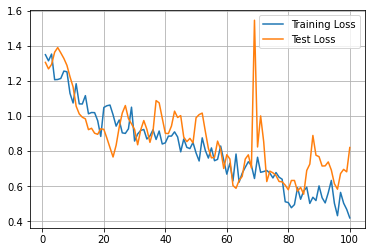

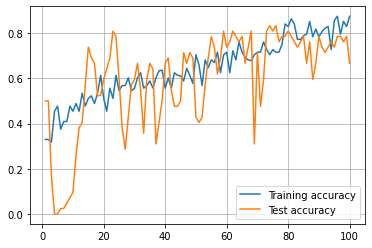

In [13]:
loss, accuracy = VGG16_model.evaluate(test)
print(loss, accuracy)

import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)


plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

In [14]:
VGG16_model.save('/content/drive/My Drive/Colab Notebooks/models/three_labels.h5')

In [29]:
from keras.models import load_model
VGG16_model = load_model('/content/drive/My Drive/Colab Notebooks/models/three_labels.h5')

In [15]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 3708035
-rw------- 1 root root   21346912 Mar 24 04:32 003_dogs_cats_augmentation.h5
-rw------- 1 root root   25199032 Mar 24 05:20 004_dogs_and_cats_features_extraction.h5
-rw------- 1 root root  140748416 Mar 24 07:32 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  744728176 Apr  9 07:42 pre_check_model.h5
-rw------- 1 root root 1375511656 May 14 08:56 three_labels.h5
-rw------- 1 root root  744745688 Apr 21 02:20 VGG16_5-1_batch_size_40.h5
-rw------- 1 root root  744745576 Apr 21 05:19 VGG16_5-1_batch_size_40_split.h5


In [10]:
#%cd /img
from google.colab import files
loaded = files.upload()

Saving unnamed.jpg to unnamed.jpg


In [24]:
data_root = pathlib.Path(glob('/content/drive/MyDrive/Colab Notebooks/datasets/*')[0])
print(data_root)

/content/drive/MyDrive/Colab Notebooks/datasets/three_label


In [25]:
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

In [36]:
import cv2
import random

plt.figure(figsize=((16, 25)))

for n in range(15):
    image_path = random.choice(all_image_paths)

    img = cv2.imread(image_path)
    img=cv2.resize(img, dsize=(224,224))
    img = img / 255.0 
    img = np.expand_dims(img, axis=0)  

    logits = VGG16_model.predict(img)[0]

    plt.subplot(5,3, n+1)
    plt.imshow(plt.imread(image_path))
    idx = image_path.split('/')[-2]
    plt.title('label: ' + str(idx))
    plt.xlabel(str(logits))

ValueError: ignored

<Figure size 1152x1800 with 0 Axes>